In [ ]:
!pip install transformers timm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 18.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 41.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.0/302.0 kB 37.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.8/3.8 MB 56.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 28.7 MB/s eta 0:00:00


In [ ]:
from transformers import pipeline
from PIL import Image, ImageDraw
import requests
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import numpy as np

# Classification

![ViT](https://production-media.paperswithcode.com/methods/Screen_Shot_2021-01-26_at_9.43.31_PM_uI4jjMq.png)

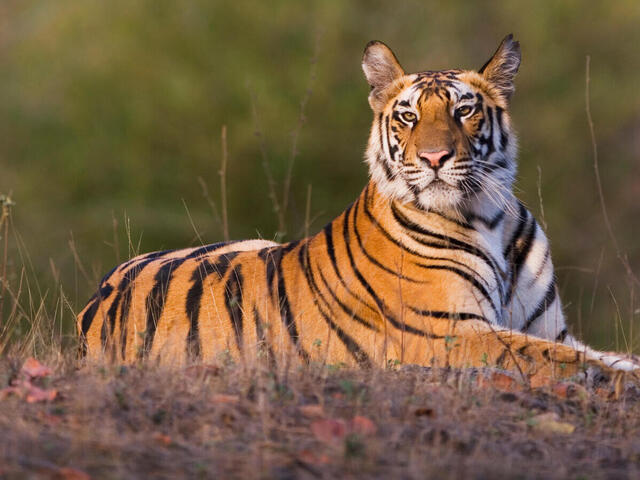

In [ ]:
url = "https://files.worldwildlife.org/wwfcmsprod/images/Tiger_resting_Bandhavgarh_National_Park_India/hero_small/6aofsvaglm_Medium_WW226365.jpg"
resp = requests.get(url, stream=True).raw
img = Image.open(resp)
img

In [ ]:
pipe = pipeline("image-classification", model="google/vit-base-patch16-224")

In [ ]:
pipe(img)

[{'score': 0.9286802411079407, 'label': 'tiger, Panthera tigris'},
 {'score': 0.06476154178380966, 'label': 'tiger cat'},
 {'score': 0.001201768172904849,
  'label': 'jaguar, panther, Panthera onca, Felis onca'},
 {'score': 0.0010769831715151668, 'label': 'leopard, Panthera pardus'},
 {'score': 0.00037633252213709056,
  'label': 'cheetah, chetah, Acinonyx jubatus'}]

# Object Detection

![DETR](https://production-media.paperswithcode.com/methods/Screen_Shot_2020-07-20_at_9.17.39_PM_ZHS2kmV.png)

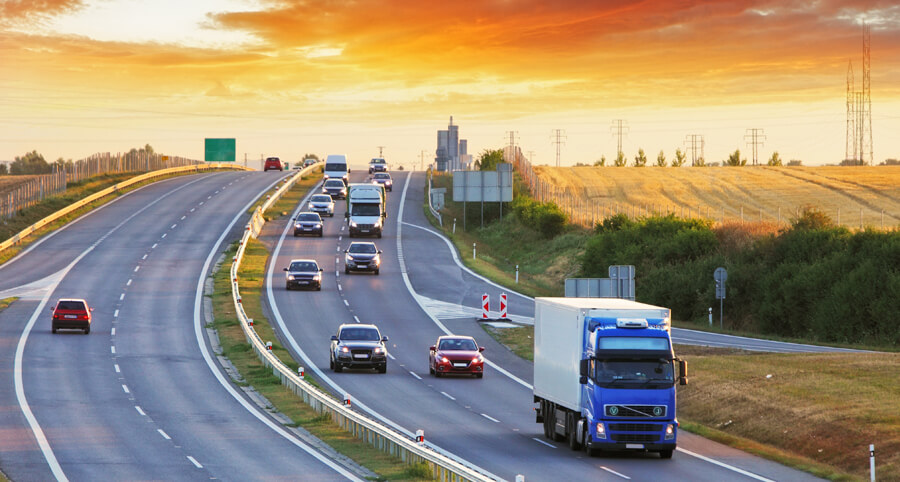

In [ ]:
url = "https://www.teletracnavman.com/media/18858/truck-only-highways-88405879-tw-900x482.jpg"
resp = requests.get(url, stream=True).raw
img = Image.open(resp)
img

In [ ]:
pipe = pipeline("object-detection", model="facebook/detr-resnet-50")

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


In [ ]:
obj_det = pipe(img)

In [ ]:
obj_det

[{'score': 0.9966182112693787,
  'label': 'car',
  'box': {'xmin': 342, 'ymin': 244, 'xmax': 382, 'ymax': 276}},
 {'score': 0.9604715704917908,
  'label': 'car',
  'box': {'xmin': 262, 'ymin': 158, 'xmax': 280, 'ymax': 172}},
 {'score': 0.994986891746521,
  'label': 'car',
  'box': {'xmin': 292, 'ymin': 212, 'xmax': 323, 'ymax': 236}},
 {'score': 0.9967625141143799,
  'label': 'car',
  'box': {'xmin': 328, 'ymin': 324, 'xmax': 390, 'ymax': 374}},
 {'score': 0.9974648952484131,
  'label': 'car',
  'box': {'xmin': 48, 'ymin': 299, 'xmax': 91, 'ymax': 335}},
 {'score': 0.9839754104614258,
  'label': 'car',
  'box': {'xmin': 307, 'ymin': 194, 'xmax': 333, 'ymax': 216}},
 {'score': 0.9708470702171326,
  'label': 'truck',
  'box': {'xmin': 323, 'ymin': 155, 'xmax': 346, 'ymax': 181}},
 {'score': 0.9961878657341003,
  'label': 'car',
  'box': {'xmin': 284, 'ymin': 260, 'xmax': 322, 'ymax': 291}},
 {'score': 0.9834965467453003,
  'label': 'truck',
  'box': {'xmin': 344, 'ymin': 184, 'xmax': 38

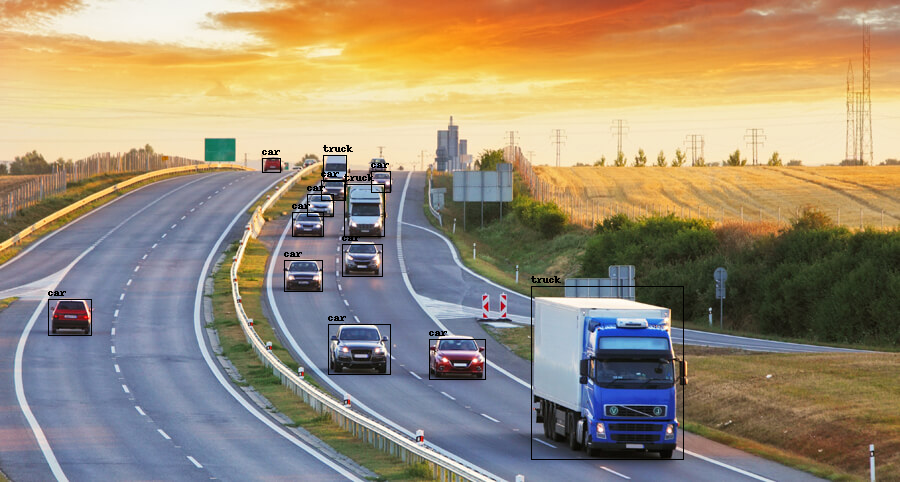

In [ ]:
draw = ImageDraw.Draw(img)
for d in obj_det:
  box = d['box']
  label = d['label']
  xy = [box["xmin"], box['ymin'], box["xmax"], box["ymax"]]
  draw.rectangle(xy, outline="black", width=1)
  draw.text( (box["xmin"], box['ymin']-12), text=label, fill="black")
img

# Segmentation

![segformer](https://production-media.paperswithcode.com/methods/c84b18b5-4329-49fc-a5f2-804ef580a966.png)

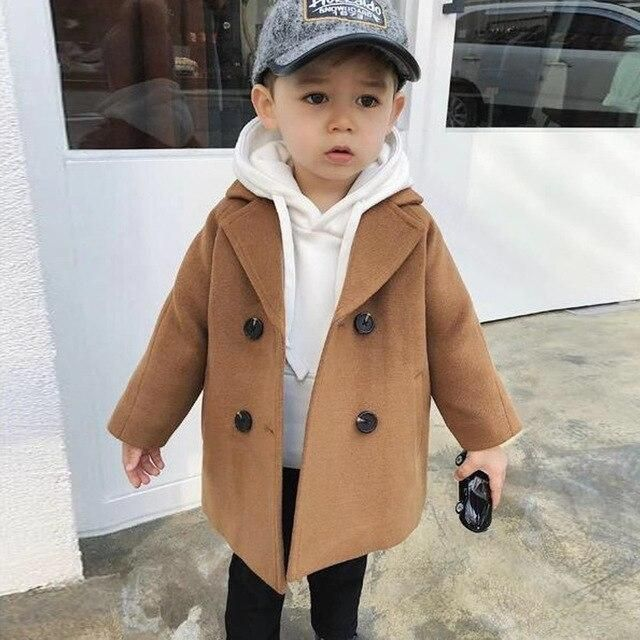

In [ ]:
url = "https://i.pinimg.com/1200x/4c/0d/26/4c0d2631233e726ad571ee5cf0358da1.jpg"
resp = requests.get(url, stream=True).raw
img = Image.open(resp)
img

In [ ]:
pipe = pipeline("image-segmentation", model="mattmdjaga/segformer_b2_clothes")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.
/usr/local/lib/python3.10/dist-packages/transformers/models/segformer/image_processing_segformer.py:101: FutureWarning: The `reduce_labels` parameter is deprecated and will be removed in a future version. Please use `do_reduce_labels` instead.
  warnings.warn(


In [ ]:
seg_out = pipe(img)

In [ ]:
seg_out

[{'score': None,
  'label': 'Background',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Hat',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Hair',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Sunglasses',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Upper-clothes',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Pants',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Left-shoe',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Face',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Left-arm',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Right-arm',
  'mask': <PIL.Image.Image image mode=L size=640x640>},
 {'score': None,
  'label': 'Scarf',
  'mask'

In [ ]:
mycolors = ["gray","blue","red","yellow","green","cyan","orange","purple","lime","pink","teal"]

In [ ]:
def binary_to_color(i):
  mask = np.array(seg_out[i]["mask"].convert("RGB"))/255.0
  mask[:,:,0]*=mcolors.to_rgb(mycolors[i])[0]
  mask[:,:,1]*=mcolors.to_rgb(mycolors[i])[1]
  mask[:,:,2]*=mcolors.to_rgb(mycolors[i])[2]
  return mask

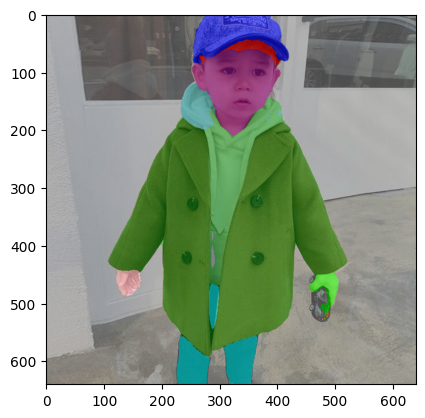

In [ ]:
img = np.array(img)*0.45
for i in range(len(seg_out)):
  m = binary_to_color(i)*255
  img += m*0.55
img = np.round(img).astype(int)
plt.imshow(img)

# Depth Estimation

![dpthybridmidas](https://huggingface.co/datasets/huggingface/documentation-images/resolve/main/dpt_architecture.jpg)

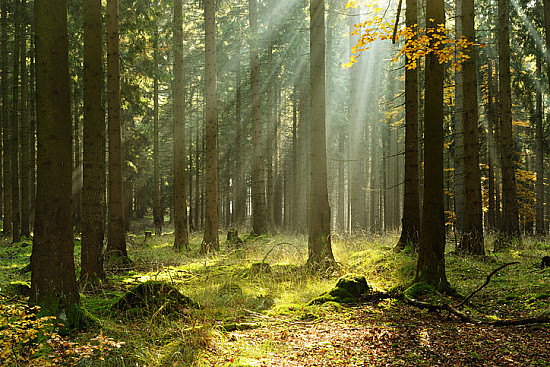

In [ ]:
url = "https://domf5oio6qrcr.cloudfront.net/medialibrary/10190/conversions/GettyImages-499689946-thumb.jpg"
resp = requests.get(url, stream=True).raw
img = Image.open(resp)
img

In [ ]:
pipe = pipeline("depth-estimation", model="Intel/dpt-hybrid-midas")

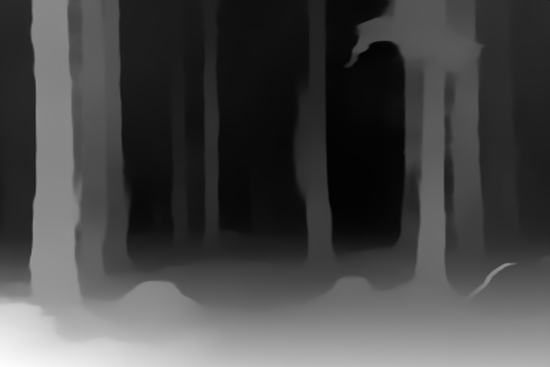

In [ ]:
pipe(img)["depth"]

# Image Captioning

![BLIP2](https://api.wandb.ai/files/gladiator/images/projects/37363826/6975edf9.png)

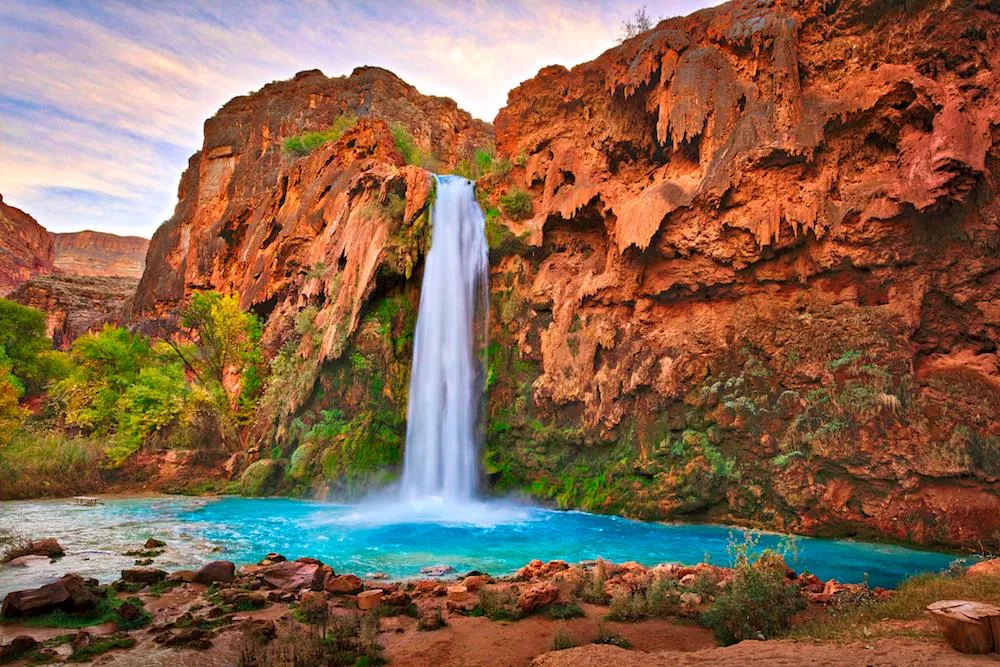

In [ ]:
url = "https://th-thumbnailer.cdn-si-edu.com/A5v0aVWMyApsF2yZuLXY3kWObaU=/fit-in/1600x0/filters:focal(452x280:453x281)/https://tf-cmsv2-smithsonianmag-media.s3.amazonaws.com/filer/b0/e2/b0e22e41-79d2-418e-9c55-01e396bd9891/istock-892494008.jpg"
resp = requests.get(url, stream=True).raw
img = Image.open(resp)
img

In [ ]:
pipe = pipeline("image-to-text", model="Salesforce/blip-image-captioning-large")

In [ ]:
pipe(img)

/usr/local/lib/python3.10/dist-packages/transformers/generation/utils.py:1260: UserWarning: Using the model-agnostic default `max_length` (=20) to control the generation length. We recommend setting `max_new_tokens` to control the maximum length of the generation.
  warnings.warn(


[{'generated_text': 'a waterfall in the middle of a canyon with a blue pool'}]

# Visual Question Answering

![ViLT](https://production-media.paperswithcode.com/methods/e99bcb9b-eecf-4a7e-acb6-8e03c70e8261.png)

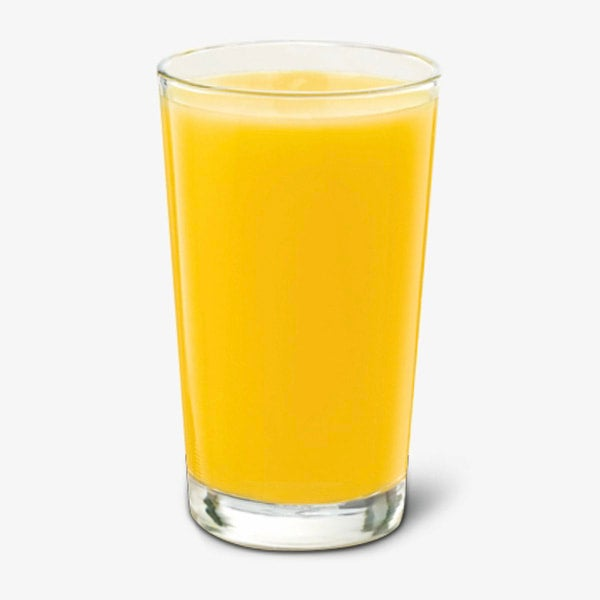

In [ ]:
url = "https://140244434.cdn6.editmysite.com/uploads/1/4/0/2/140244434/s708130995878858689_p52_i1_w600.jpeg"
resp = requests.get(url, stream=True).raw
img = Image.open(resp)
img

In [ ]:
pipe = pipeline("visual-question-answering", model="dandelin/vilt-b32-finetuned-vqa")

Could not find image processor class in the image processor config or the model config. Loading based on pattern matching with the model's feature extractor configuration.


In [ ]:
pipe(image=img,question="what is inside the glass?")

[{'score': 0.8677876591682434, 'answer': 'orange juice'},
 {'score': 0.4221733510494232, 'answer': 'juice'},
 {'score': 0.07461366802453995, 'answer': 'orange'},
 {'score': 0.022486459463834763, 'answer': 'beer'},
 {'score': 0.020249074324965477, 'answer': 'soda'}]

In [ ]:
pipe(image=img,question="is this glass full?")

[{'score': 0.9795820713043213, 'answer': 'yes'},
 {'score': 0.12162816524505615, 'answer': 'no'},
 {'score': 0.005382778123021126, 'answer': 'full'},
 {'score': 0.0026752506382763386, 'answer': 'half'},
 {'score': 0.0009822278516367078, 'answer': 'half full'}]

In [ ]:
pipe(image=img,question="is this a glass of juice or water?")

[{'score': 0.3945346474647522, 'answer': 'orange juice'},
 {'score': 0.1021638736128807, 'answer': 'juice'},
 {'score': 0.042751070111989975, 'answer': 'yes'},
 {'score': 0.035509105771780014, 'answer': 'orange'},
 {'score': 0.012057374231517315, 'answer': 'both'}]